In [ ]:
!pip install ultralytics
!pip install roboflow
!pip install pycocotools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from ultralytics import YOLO
from IPython.display import Image
from roboflow import Roboflow

from google.colab import drive
drive.mount('/content/drive')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/00_Neptune/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/labels/282555,cf0fc000fc465a65.txt  
  inflating: dataset/labels/282555,cf1160005b3d4bea.txt  
  inflating: dataset/labels/282555,cfe0000d76800d0.txt  
  inflating: dataset/labels/282555,cff3e000e7c961ce.txt  
  inflating: dataset/labels/282555,cff7c0000d5f8bab.txt  
  inflating: dataset/labels/282555,d00b200014f48270.txt  
  inflating: dataset/labels/282555,d00e000061f09b32.txt  
  inflating: dataset/labels/282555,d014b0006e70c384.txt  
  inflating: dataset/labels/282555,d02680001927bcc3.txt  
  inflating: dataset/labels/282555,d02e4000a7a67934.txt  
  inflating: dataset/labels/282555,d030d000c312f11b.txt  
  inflating: dataset/labels/282555,d03570007a958067.txt  
  inflating: dataset/labels/282555,d0400000716e67a8.txt  
  inflating: dataset/labels/282555,d067000fac6b260.txt  
  inflating: dataset/labels/282555,d08130006e50a75b.txt  
  inflating: dataset/labels/282555,d0871000b13be271.txt  
  inflating: dataset/la

In [ ]:
!yolo task=detect mode=train data="/content/drive/MyDrive/00_Neptune/data.yaml" model="yolo11n.pt" epochs=50 imgsz=640

Streaming output truncated to the last 5000 lines.
train: WARNING ⚠️ /content/dataset/images/273271,452300080a607f9.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.8337      1.0281      1.4239      1.0164      1.0043]
train: WARNING ⚠️ /content/dataset/images/273271,48f60009d22393b.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0308      1.6142      1.0126      1.0183      1.0251]
train: WARNING ⚠️ /content/dataset/images/273271,49190000d389944.jpg: ignoring corrupt image/label: negative label values [  -0.006111]
train: WARNING ⚠️ /content/dataset/images/273271,49880000471782c.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.012]
train: WARNING ⚠️ /content/dataset/images/273271,4a3a000e225d894.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.4944      1.1615]
train: WARNING ⚠️ /content/dataset/images/273271,4f9d000d88dfe5f.jpg: ign

In [ ]:
rf = Roboflow(api_key="swg5iePUilKJBphWIXtG")
project = rf.workspace("neptune-uxxqf").project("neptune")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Neptune-1 in yolov11:: 100%|██████████| 66/66 [00:00<00:00, 5838.82it/s]


In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=2000 imgsz=640

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Neptune-1/data.yaml, epochs=2000, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

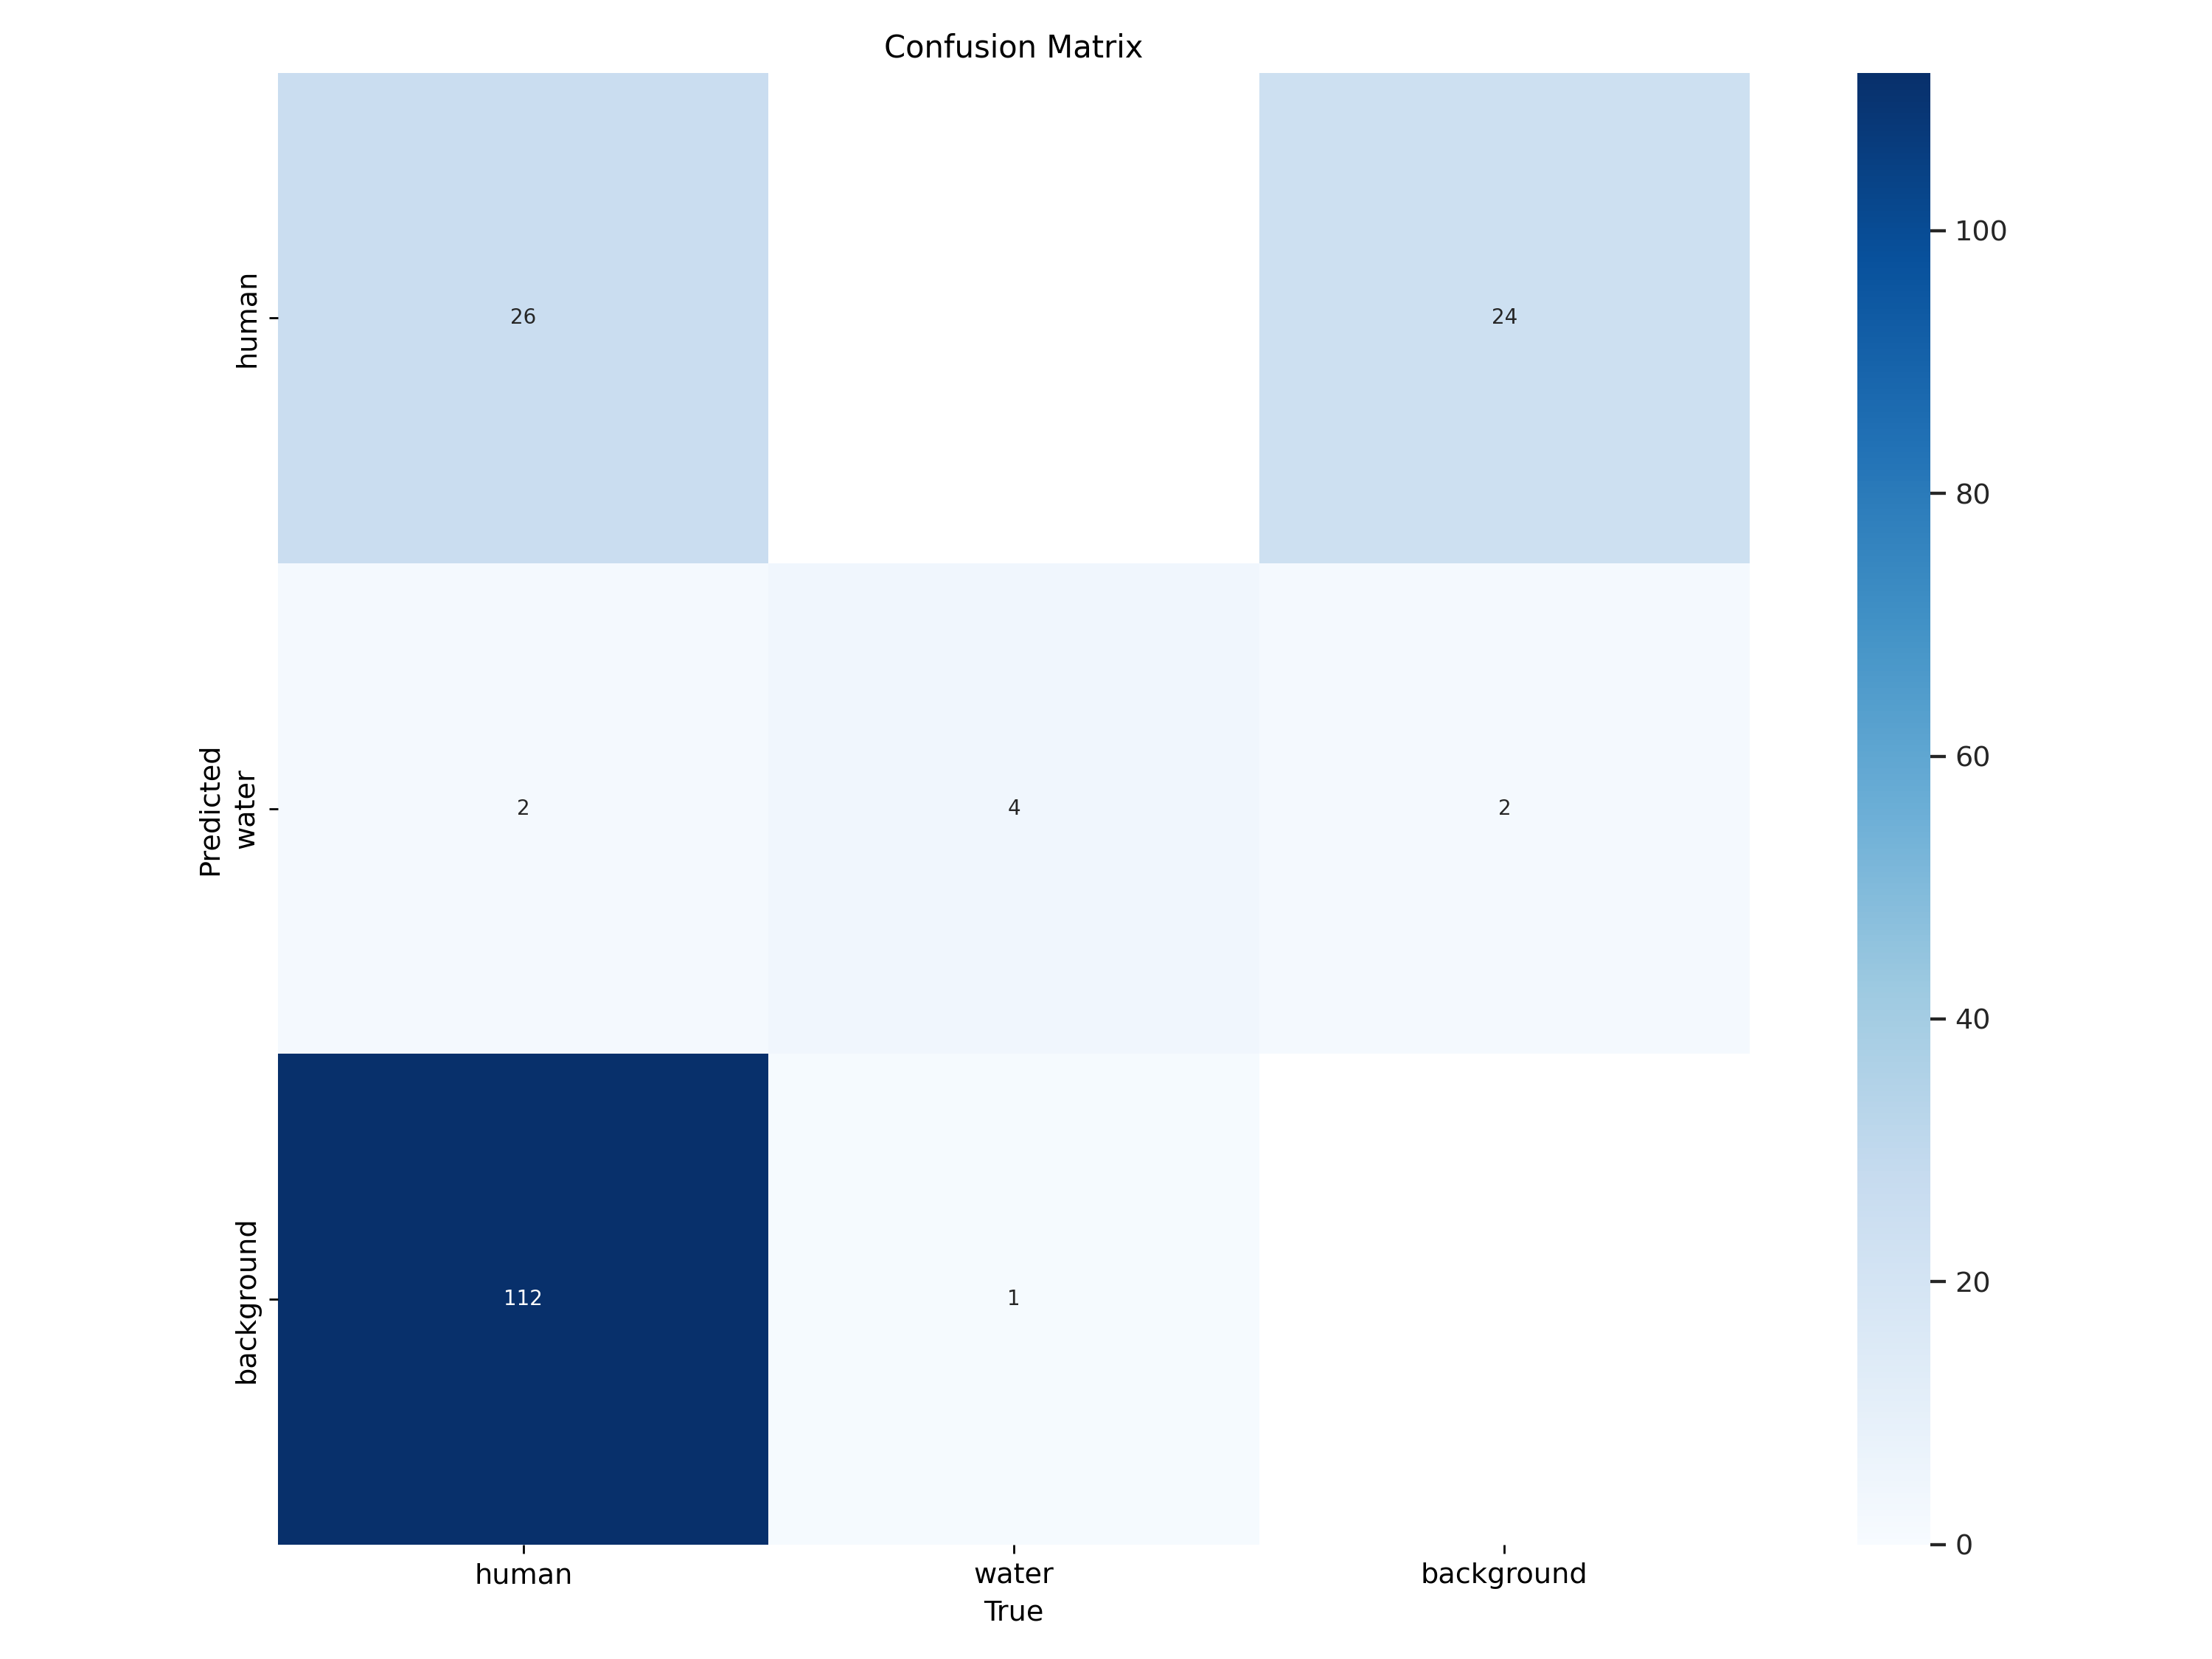

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=1200)

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=1000)